In [1]:
# Pacotes de trabalho
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando os dados
df = pd.read_csv("dados.csv", sep=';', encoding='utf-8')

In [3]:
# Visualizando os dados
df.head()

,prod_order,order_date,amount,unit_measure,unit_value,total_billing,cogs,profit margin,order_id,product_id,product_name,aisle_id,aisle,department_id,department
0,11699021,2022-08-01,2.155,KG,4.69,10.10695,6.0340,4.07295,116990,21,BATATA LAVADA,24,HORTIFRUTI,163,LEGUMES
1,11699241673,2022-08-01,1.000,UN,19.80,19.80000,11.9930,7.80700,116992,41673,VODKA BALALAIKA 1L,11,BEBIDAS,345,DESTILADOS
2,11699248084,2022-08-01,1.000,UN,4.79,4.79000,3.2250,1.56500,116992,48084,CHA OETKER CAMOMILA C/10,40,MATINAIS,267,CHÁ
3,11699244643,2022-08-01,0.110,KG,39.90,4.38900,2.0998,2.28920,116992,44643,PAO DE QUEIJO PARMESAO KG,13,PADARIA PRODUCAO,47,PAO DE QUEIJO. BISCOITÃO. PALITINHO
4,12641440757,2022-08-01,1.000,UN,1.89,1.89000,1.2270,0.66300,126414,40757,SUCO TIAL KIDS GOIABA 200ML,11,BEBIDAS,348,SUCO


In [4]:
# Verificando as linhas e colunas
print(f'Números de linhas: {df.shape[0]} -- Número de colunas: {df.shape[1]}')

Números de linhas: 146305 -- Número de colunas: 15


In [5]:
# Verificando um resumo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146305 entries, 0 to 146304
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   prod_order     146305 non-null  int64  
 1   order_date     146305 non-null  object 
 2   amount         146305 non-null  float64
 3   unit_measure   146305 non-null  object 
 4   unit_value     146305 non-null  float64
 5   total_billing  146305 non-null  float64
 6   cogs           146305 non-null  float64
 7   profit margin  146305 non-null  float64
 8   order_id       146305 non-null  int64  
 9   product_id     146305 non-null  int64  
 10  product_name   146305 non-null  object 
 11  aisle_id       146305 non-null  int64  
 12  aisle          146305 non-null  object 
 13  department_id  146305 non-null  int64  
 14  department     146305 non-null  object 
dtypes: float64(5), int64(5), object(5)
memory usage: 16.7+ MB


Não foram identificados valores ausentes e a tipagem das váriaveis estão adequadas, exceto pela coluna "order_date" que precisa ser ajustada com data.

In [6]:
# Vamos excluir colunas do tipo id e traduzir os nomes das colunas
df_selec = df.drop(columns=['prod_order','order_id','product_id','aisle_id','department_id'])
df_selec.rename(columns={'order_date':'Data_Venda','amount':'Qtd','unit_measure':'Un Medida','unit_value':'Valor_Unit',
                        'total_billing':'Valor_Total', 'cogs':'CMV', 'profit margin':'Margem_Lucro',
                        'product_name':'Produto','aisle':'Corredor','department':'Departamento'}, inplace=True)

In [7]:
# Tratamento de datas e criando novas variáveis
df_selec['Data_Venda'] = pd.to_datetime(df_selec['Data_Venda'])
df_selec['Dia_do_mes'] = df_selec['Data_Venda'].dt.day
df_selec['Dia_da_semana'] = df_selec['Data_Venda'].dt.dayofweek
#Tradução das datas e colunas
traducao_dia = {'Tuesday':'Terça',
                'Saturday':'Sabado',
                'Sunday':'Domingo',
                'Monday':'Segunda',
                'Wednesday':'Quarta',
                'Friday':'Sexta',
                'Thursday':'Quinta'}
df_selec['Nome_do_dia'] = df_selec['Data_Venda'].dt.day_name().map(traducao_dia)
# Criando nova variavel para analisar o tipo de período do mes
df_selec['Periodo_Mes'] = np.where((df_selec['Dia_do_mes'] <= 10) , "Inicio", 
                                   np.where((df_selec['Dia_do_mes'] <= 20),"Meio", "Fim"))

In [8]:
# Amostra dos dados
df_selec.sample(5)

,Data_Venda,Qtd,Un Medida,Valor_Unit,Valor_Total,CMV,Margem_Lucro,Produto,Corredor,Departamento,Dia_do_mes,Dia_da_semana,Nome_do_dia,Periodo_Mes
36997,2022-08-13,1.255,KG,14.99,18.81245,10.4579,8.35455,MACA ARGENTINA KG,HORTIFRUTI,FRUTAS,13,5,Sabado,Meio
71701,2022-08-27,1.000,UN,7.99,7.99000,5.2030,2.78700,AGUA DE COCO SOCOCO 1L,BEBIDAS,AGUA DE CÔCO,27,5,Sabado,Fim
119637,2022-09-16,0.775,KG,7.49,5.80475,3.5487,2.25605,CEBOLA EXTRA,HORTIFRUTI,LEGUMES,16,4,Sexta,Meio
121847,2022-09-17,1.000,UN,9.90,9.90000,7.0670,2.83300,OVOS BRANCO G.ORIENTE C/12,HORTIFRUTI,OVOS,17,5,Sabado,Meio
95157,2022-09-06,0.540,KG,5.99,3.23460,1.7998,1.43480,LARANJA BAHIA,HORTIFRUTI,FRUTAS,6,1,Terça,Inicio


In [9]:
# Visualizando o números produtos, corredor e departamentos
print(f"Número de Produtos: {df_selec['Produto'].nunique()}")
print(f"Número de Corredores: {df_selec['Corredor'].nunique()}")
print(f"Número de Departamentos: {df_selec['Departamento'].nunique()}")

Número de Produtos: 3305
Número de Corredores: 29
Número de Departamentos: 247


In [10]:
# Extraindo um resumo das variáveis númericas com média, mediana, desvio padrão e o range de dados.
round(df_selec[['Qtd','Valor_Unit','Valor_Total','CMV','Margem_Lucro']].describe(),2)

,Qtd,Valor_Unit,Valor_Total,CMV,Margem_Lucro
count,146305.00,146305.00,146305.00,146305.00,146305.00
mean,0.82,13.00,7.00,4.00,3.00
std,1.25,12.86,14.63,5.80,10.47
min,0.00,0.35,0.02,0.00,-149.46
25%,0.31,4.49,2.95,1.25,1.23
50%,1.00,7.99,4.99,2.50,2.19
75%,1.00,15.90,8.51,4.90,3.74
max,346.00,189.00,4809.40,1003.40,3806.00


In [11]:
# Extraindo um resumo das variáveis categoricas
round(df_selec.describe(include='object'),2)

,Un Medida,Produto,Corredor,Departamento,Nome_do_dia,Periodo_Mes
count,146305,146305,146305,146305,146305,146305
unique,7,3305,29,247,6,3
top,KG,PAO FRANCES,HORTIFRUTI,FRUTAS,Segunda,Inicio
freq,83265,13107,49438,23972,29927,54634


In [12]:
round(df_selec[['Qtd','Valor_Unit','Valor_Total','CMV','Margem_Lucro']].corr(),2)

,Qtd,Valor_Unit,Valor_Total,CMV,Margem_Lucro
Qtd,1.00,-0.23,0.78,0.62,0.74
Valor_Unit,-0.23,1.00,0.18,0.25,0.11
Valor_Total,0.78,0.18,1.00,0.81,0.95
CMV,0.62,0.25,0.81,1.00,0.58
Margem_Lucro,0.74,0.11,0.95,0.58,1.00


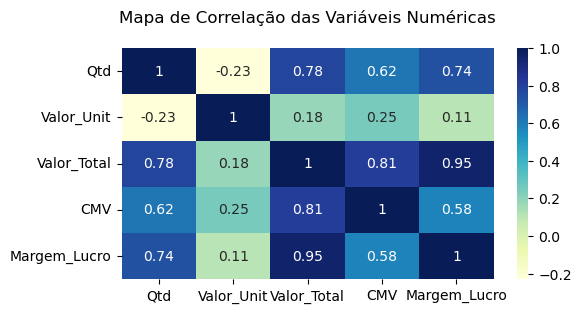

In [13]:
# heatmap correlação
plt.figure(figsize = (6,3))
sns.heatmap(round(df_selec[['Qtd','Valor_Unit','Valor_Total','CMV','Margem_Lucro']].corr(),2), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 12)
plt.show()

Com as informações acima, é Possível extrairmos alguns insights interessantes como por exemplo:
Produto mais vendido.
Dia da semana que mais ocorre vendas.
Quando do mês ocorre o maior volume de vendas (Inicio, meio ou fim).
Média, mediana e desvio da Margem de lucro.
Podemos explorar a relação de margem de lucro com as variáveis Qtd, valor total e CMV.

# Analisando o Faturamento Bruto e Margem de Lucro
#### Por período do mês, por dia da semana, por corredor e por top produtos

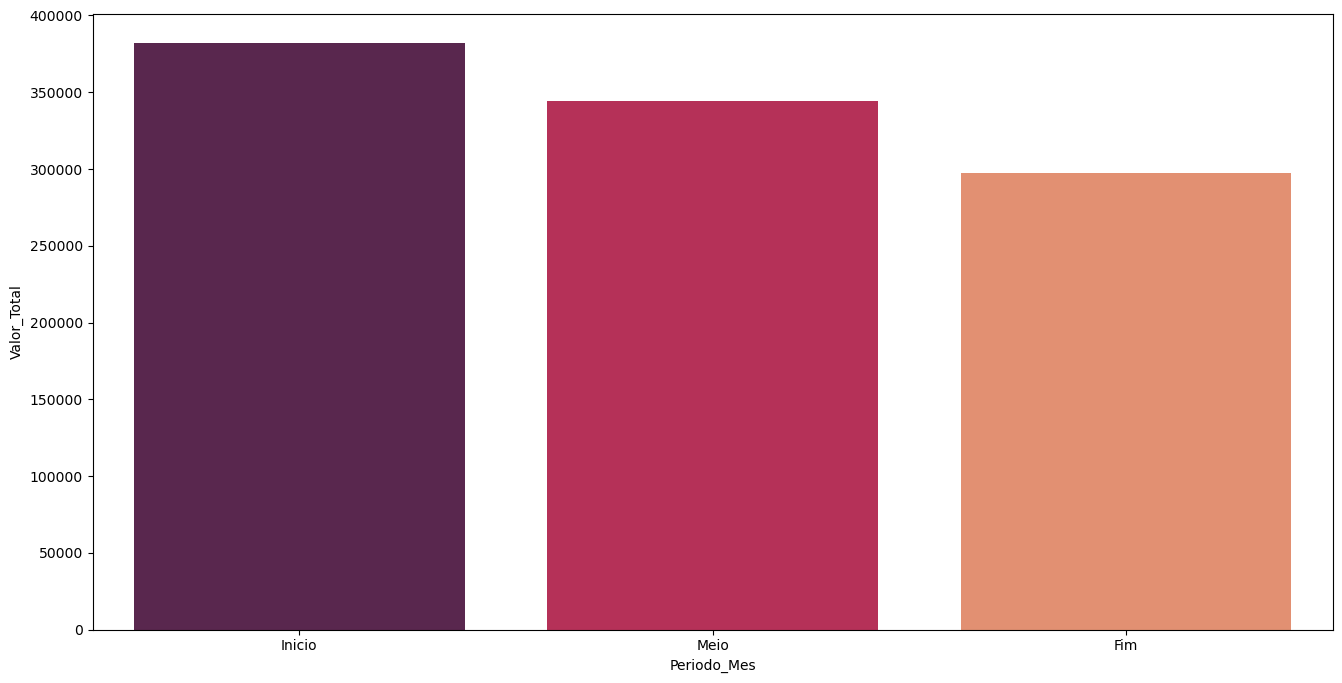

In [14]:
# Faturamento pelo tipo de período do mês
df_tipo_dia_mes1 = df_selec.groupby(['Periodo_Mes']).sum('Valor_Total')
df_tipo_dia_mes1 = pd.DataFrame(df_tipo_dia_mes1['Valor_Total'].sort_values(ascending=False).reset_index())

# Gráfico
plt.figure(figsize = (16, 8))
sns.barplot(x = df_tipo_dia_mes1['Periodo_Mes'], y = df_tipo_dia_mes1['Valor_Total'],
            palette = 'rocket')
plt.show()

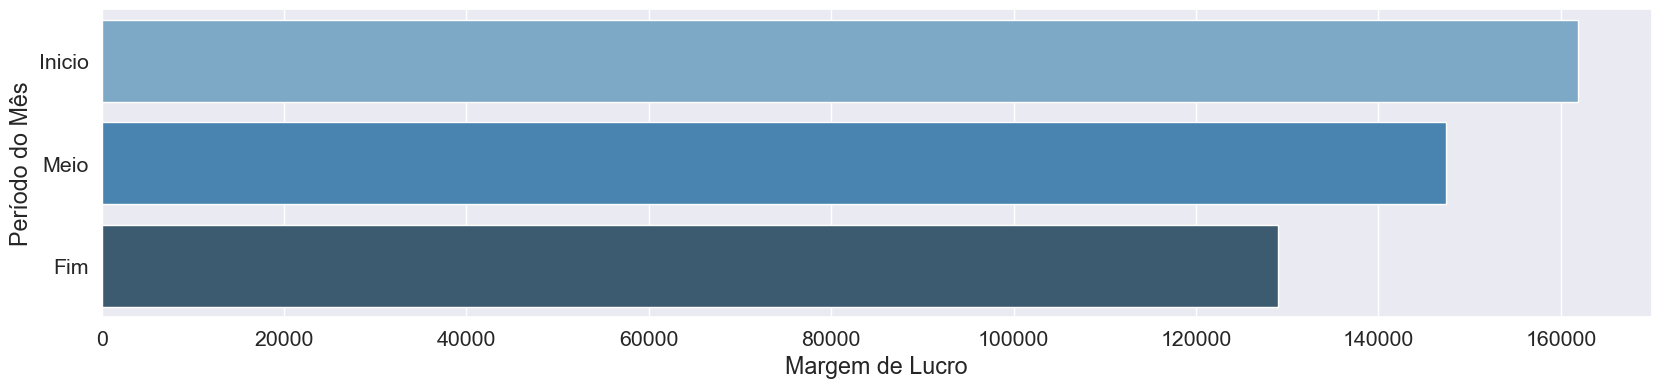

In [15]:
# Margem de Lucro pelo tipo de período do mês
df_tipo_dia_mes2 = df_selec.groupby(['Periodo_Mes']).sum('Margem_Lucro')
df_tipo_dia_mes2 = pd.DataFrame(df_tipo_dia_mes2['Margem_Lucro'].sort_values(ascending=False).reset_index())
#Grafico
sns.set(font_scale = 1.4)
plt.figure(figsize = (20,4))
sns.barplot(x = "Margem_Lucro", y = "Periodo_Mes", data = df_tipo_dia_mes2, palette = "Blues_d")
plt.xlabel('Margem de Lucro')
plt.ylabel('Período do Mês')
plt.show()

In [16]:
# Verificando a diferença percentual do faturamento entre o período de inicio e fim do mês
df_tipo_dia_mes1 = df_selec.groupby(['Periodo_Mes']).sum('Valor_Total')
df_tipo_dia_mes1 = pd.DataFrame(df_tipo_dia_mes1['Valor_Total'].sort_values(ascending=False)).T
resultado = round(df_tipo_dia_mes1['Fim'] / df_tipo_dia_mes1['Inicio'] -1,4)
if resultado[0] <0:
    print(f'O faturamento entre o inicio e o fim do mês reduz em: {resultado[0] * 100}%')
else:
    print(f'O faturamento entre o inicio e o fim do mês cresce em: {resultado[0] * 100}%')

O faturamento entre o inicio e o fim do mês reduz em: -22.18%


In [17]:
# Verificando a diferença percentual da margem de lucro entre o período de inicio e fim do mês
df_tipo_dia_mes2 = df_selec.groupby(['Periodo_Mes']).sum('Margem_Lucro')
df_tipo_dia_mes2 = pd.DataFrame(df_tipo_dia_mes2['Margem_Lucro'].sort_values(ascending=False)).T
resultado1 = round(df_tipo_dia_mes2['Fim'] / df_tipo_dia_mes2['Inicio'] -1,4)
if resultado1[0] <0:
    print(f'A margem entre o inicio e o fim do mês reduz em: {resultado1[0] * 100}%')
else:
    print(f'A margem entre o inicio e o fim do mês cresce em: {resultado1[0] * 100}%')

A margem entre o inicio e o fim do mês reduz em: -20.31%


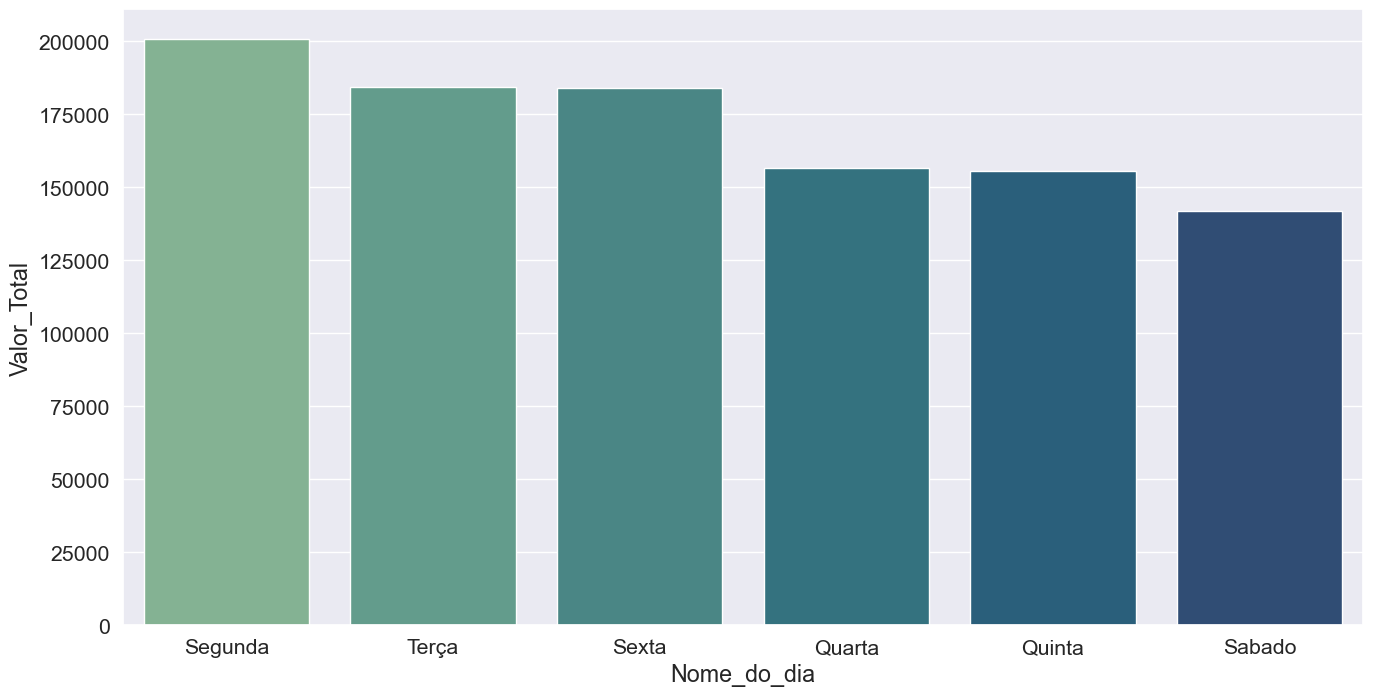

In [18]:
# Faturamento pelo tipo de dia da semana
df_tipo_dia_semana = df_selec.groupby(['Nome_do_dia']).sum()[['Valor_Total','Margem_Lucro']]
df_tipo_dia_semana = pd.DataFrame(df_tipo_dia_semana[['Valor_Total','Margem_Lucro']].sort_values(
    by = 'Valor_Total', ascending=False).reset_index())
# Gráfico
plt.figure(figsize = (16, 8))
sns.barplot(x = df_tipo_dia_semana['Nome_do_dia'], y = df_tipo_dia_semana['Valor_Total'],
            palette = 'crest', )
plt.show()

In [19]:
df_tipo_dia_semana

,Nome_do_dia,Valor_Total,Margem_Lucro
0,Segunda,200950.79487,86888.87777
1,Terça,184355.61949,79375.85549
2,Sexta,183924.67442,78210.78422
3,Quarta,156702.79852,67232.20292
4,Quinta,155626.09924,66073.86394
5,Sabado,141938.14789,60507.66749


In [20]:
# Analisando o faturamento por dia da semana e sua representatividade sobre o faturamento total
df_tipo_dia_semana2  = df_tipo_dia_semana
df_tipo_dia_semana2.rename(columns={'Valor_Total':'Faturamento','Margem_Lucro':'Margem'}, inplace=True)
df_tipo_dia_semana2['Faturamento Acumulado'] = df_tipo_dia_semana2['Faturamento'].cumsum()
df_tipo_dia_semana2['% do Faturamento'] = df_tipo_dia_semana2['Faturamento'] / df_tipo_dia_semana2['Faturamento'].sum() * 100
df_tipo_dia_semana2['% do Faturamento Acumulado'] = df_tipo_dia_semana2['% do Faturamento'].cumsum()
df_tipo_dia_semana2['Margem Acumulada'] = df_tipo_dia_semana2['Margem'].cumsum()
df_tipo_dia_semana2['% da Margem'] = df_tipo_dia_semana2['Margem'] / df_tipo_dia_semana2['Margem'].sum() * 100
df_tipo_dia_semana2['% da Margem Acumulada'] = df_tipo_dia_semana2['% da Margem'].cumsum()
round(df_tipo_dia_semana2,2)

,Nome_do_dia,Faturamento,Margem,Faturamento Acumulado,% do Faturamento,% do Faturamento Acumulado,Margem Acumulada,% da Margem,% da Margem Acumulada
0,Segunda,200950.79,86888.88,200950.79,19.63,19.63,86888.88,19.82,19.82
1,Terça,184355.62,79375.86,385306.41,18.01,37.65,166264.73,18.11,37.93
2,Sexta,183924.67,78210.78,569231.09,17.97,55.62,244475.52,17.84,55.78
3,Quarta,156702.80,67232.20,725933.89,15.31,70.93,311707.72,15.34,71.12
4,Quinta,155626.10,66073.86,881559.99,15.21,86.13,377781.58,15.08,86.19
5,Sabado,141938.15,60507.67,1023498.13,13.87,100.00,438289.25,13.81,100.00


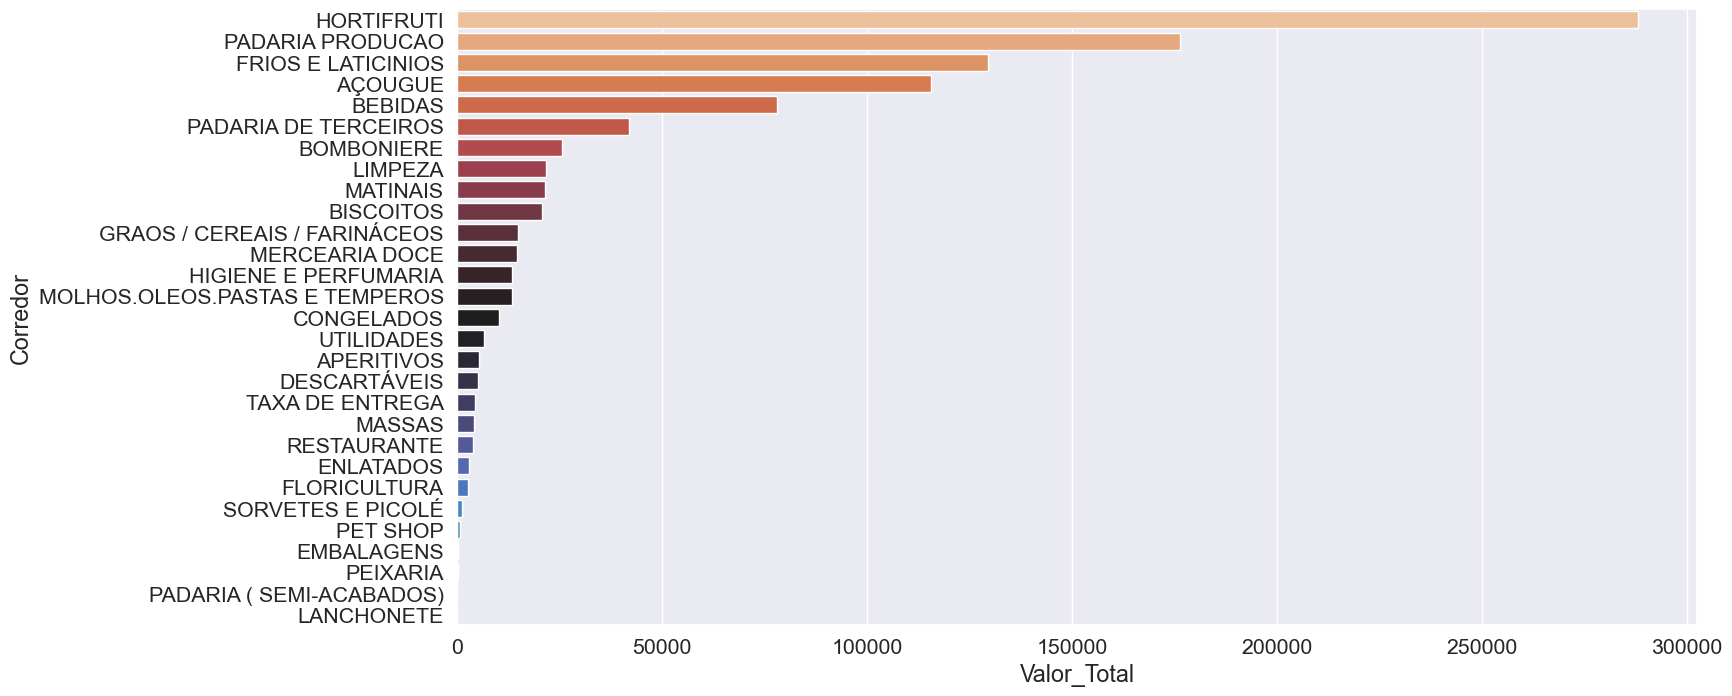

In [21]:
# Faturamento por corredor
df_corredor = df_selec.groupby(['Corredor']).sum()[['Valor_Total','Margem_Lucro']]
df_corredor = pd.DataFrame(df_corredor[['Valor_Total','Margem_Lucro']].sort_values(
    by = 'Valor_Total', ascending=False).reset_index())
# Gráfico
plt.figure(figsize = (16, 8))
sns.barplot(y = df_corredor['Corredor'], x = df_corredor['Valor_Total'],
            palette = 'icefire_r' )
plt.show()

In [22]:
# Analisando o faturamento por corredor e sua representatividade sobre o faturamento total
df_corredor2  = df_corredor
df_corredor2.rename(columns={'Valor_Total':'Faturamento','Margem_Lucro':'Margem'}, inplace=True)
df_corredor2['Faturamento Acumulado'] = df_corredor2['Faturamento'].cumsum()
df_corredor2['% do Faturamento'] = df_corredor2['Faturamento'] / df_corredor2['Faturamento'].sum() * 100
df_corredor2['% do Faturamento Acumulado'] = df_corredor2['% do Faturamento'].cumsum()
df_corredor2['Margem Acumulada'] = df_corredor2['Margem'].cumsum()
df_corredor2['% da Margem'] = df_corredor2['Margem'] / df_corredor2['Margem'].sum() * 100
df_corredor2['% da Margem Acumulada'] = df_corredor2['% da Margem'].cumsum()
round(df_corredor2,2)

,Corredor,Faturamento,Margem,Faturamento Acumulado,% do Faturamento,% do Faturamento Acumulado,Margem Acumulada,% da Margem,% da Margem Acumulada
0,HORTIFRUTI,288017.28,128499.84,288017.28,28.14,28.14,128499.84,29.32,29.32
1,PADARIA PRODUCAO,176428.51,118056.28,464445.80,17.24,45.38,246556.13,26.94,56.25
2,FRIOS E LATICINIOS,129461.25,38693.59,593907.04,12.65,58.03,285249.72,8.83,65.08
3,AÇOUGUE,115517.18,39068.44,709424.22,11.29,69.31,324318.16,8.91,74.00
4,BEBIDAS,78102.31,23290.24,787526.53,7.63,76.94,347608.41,5.31,79.31
5,PADARIA DE TERCEIROS,41885.72,18800.06,829412.25,4.09,81.04,366408.46,4.29,83.60
6,BOMBONIERE,25504.63,9870.81,854916.88,2.49,83.53,376279.27,2.25,85.85
7,LIMPEZA,21797.43,7743.71,876714.31,2.13,85.66,384022.99,1.77,87.62
8,MATINAIS,21467.61,6918.12,898181.92,2.10,87.76,390941.10,1.58,89.20
9,BISCOITOS,20746.32,7099.58,918928.24,2.03,89.78,398040.68,1.62,90.82


In [23]:
# Faturamento por top produtos
top = 20 # Ajustar parametro para mudar o tamanho do relatório
df_produto = df_selec.groupby(['Produto','Un Medida']).sum()[['Qtd','Valor_Total','Margem_Lucro']]
df_produto = pd.DataFrame(df_produto[['Qtd','Valor_Total','Margem_Lucro']].sort_values(by = 'Valor_Total', ascending=False).reset_index())
df_produto.rename(columns={'Qtd':'Quantidade','Valor_Total':'Faturamento','Margem_Lucro':'Margem'}, inplace=True)
df_produto['Faturamento Acumulado'] = df_produto['Faturamento'].cumsum()
df_produto['% do Faturamento'] = df_produto['Faturamento'] / df_corredor2['Faturamento'].sum() * 100
df_produto['%Faturamento Acumulado'] = df_produto['% do Faturamento'].cumsum()
df_produto['Margem Acumulada'] = df_produto['Margem'].cumsum()
df_produto['% da Margem'] = df_produto['Margem'] / df_tipo_dia_semana2['Margem'].sum() * 100
df_produto['% da Margem Acumulada'] = df_produto['% da Margem'].cumsum()
round(df_produto[:top],2)

,Produto,Un Medida,Quantidade,Faturamento,Margem,Faturamento Acumulado,% do Faturamento,%Faturamento Acumulado,Margem Acumulada,% da Margem,% da Margem Acumulada
0,PAO FRANCES,KG,4089.57,56289.39,44429.63,56289.39,5.50,5.50,44429.63,10.14,10.14
1,BANANA PRATA KG,KG,2917.10,23869.55,11633.90,80158.93,2.33,7.83,56063.52,2.65,12.79
2,PAO DE QUEIJO PARMESAO KG,KG,344.19,13733.34,7194.40,93892.27,1.34,9.17,63257.92,1.64,14.43
3,MAMAO HAWAI,KG,1207.72,13656.29,6902.17,107548.56,1.33,10.51,70160.09,1.57,16.01
4,PAO DE QUEIJO KG,KG,352.56,12656.76,7265.12,120205.32,1.24,11.74,77425.21,1.66,17.67
5,MAMAO FORMOSA,KG,900.42,10089.26,5866.42,130294.58,0.99,12.73,83291.63,1.34,19.00
6,PATINHO KG,KG,223.53,9607.58,3278.22,139902.16,0.94,13.67,86569.85,0.75,19.75
7,ACEM KG,KG,278.09,8933.10,2865.77,148835.26,0.87,14.54,89435.62,0.65,20.41
8,FILE DE PEITO DE FRANGO RESF KG,KG,358.98,8465.22,2737.20,157300.48,0.83,15.37,92172.82,0.62,21.03
9,QUEIJO MUSSARELA LEITE MINAS KG,KG,154.05,8437.57,1757.58,165738.05,0.82,16.19,93930.40,0.40,21.43


In [24]:
# Indicador de Representatividade do % de produtos sobre o % do faturamento bruto
df_produto['Representatividade'] = ['80% do Faturamento' if v <= 80 else '5% do Faturamento' 
                                    if v>=95 else '15% do Faturamento' for v in df_produto['%Faturamento Acumulado']]
df_produto2 = df_produto['Representatividade'].value_counts().to_frame().reset_index().rename(columns = {
    'index':'Representatividade','Representatividade':'Produtos'})

In [25]:
# Quantidade de produtos por representatividade do faturamento
df_produto2.sort_values(by='Produtos',ascending=True)

,Representatividade,Produtos
2,80% do Faturamento,595
1,15% do Faturamento,1071
0,5% do Faturamento,1643


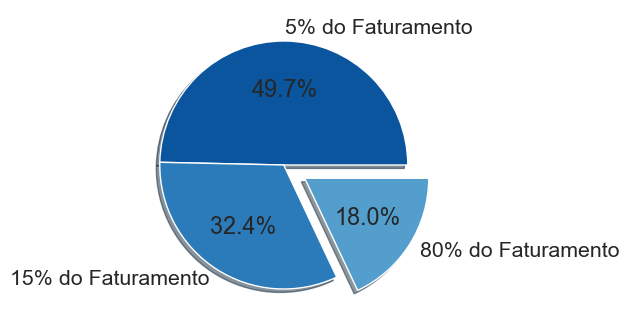

In [26]:
# Grafico de representatividade % da quantuidade de produtos em relação ao % de faturamento
sns.set_palette('Blues_r')
plt.figure(figsize = (4, 6))
plt.pie(df_produto2['Produtos'], 
        labels = df_produto2['Representatividade'], 
        explode = (0.0, 0, 0.2), 
        shadow = True,
        autopct = '%1.1f%%')
plt.show()

##### O gráfico acima mostra que 18% dos produtos são responsáveis por 80% do faturamento.

In [27]:
# 20 pordutos mais importante para a rentabilidade do negócio
df_produto['Indicador_Importancia'] = 100*(df_produto['% do Faturamento'] + df_produto['% da Margem']) / (df_produto['% do Faturamento'] + df_produto['% da Margem']).sum()
df_produto4 = df_produto[['Produto','% do Faturamento', '% da Margem','Indicador_Importancia']].sort_values(by='Indicador_Importancia',ascending=False)
df_produto4.head(20)

,Produto,% do Faturamento,% da Margem,Indicador_Importancia
0,PAO FRANCES,5.499706,10.137056,7.818381
1,BANANA PRATA KG,2.332153,2.654388,2.493271
2,PAO DE QUEIJO PARMESAO KG,1.341804,1.641473,1.491639
3,MAMAO HAWAI,1.334276,1.574798,1.454537
4,PAO DE QUEIJO KG,1.236618,1.657609,1.447113
5,MAMAO FORMOSA,0.985763,1.338481,1.162122
6,PATINHO KG,0.938700,0.747958,0.843329
11,MACA GALA EXTRA,0.795708,0.824793,0.810250
7,ACEM KG,0.872801,0.653853,0.763327
15,BANANA NANICA KG,0.672798,0.821880,0.747339
